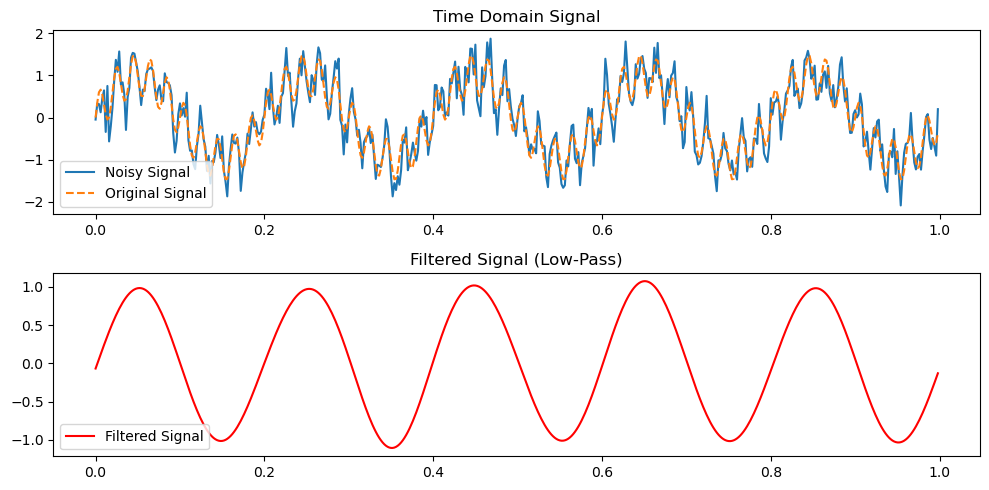

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a noisy sine wave signal
fs = 500  # Sampling frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector (1 second duration)
freq1, freq2 = 5, 50  # Frequencies in Hz
signal = np.sin(2 * np.pi * freq1 * t) + 0.5 * np.sin(2 * np.pi * freq2 * t)  # Signal with two frequencies
noise = 0.3 * np.random.randn(len(t))  # Additive noise
noisy_signal = signal + noise

# Compute Fourier Transform
fft_signal = np.fft.fft(noisy_signal)
frequencies = np.fft.fftfreq(len(t), 1/fs)

# Apply a low-pass filter (remove frequencies above 10 Hz)
cutoff = 10  # Hz
fft_signal[np.abs(frequencies) > cutoff] = 0

# Compute Inverse Fourier Transform
filtered_signal = np.fft.ifft(fft_signal)

# Plot results
plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.plot(t, noisy_signal, label="Noisy Signal")
plt.plot(t, signal, label="Original Signal", linestyle="dashed")
plt.title("Time Domain Signal")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal.real, label="Filtered Signal", color="red")
plt.title("Filtered Signal (Low-Pass)")
plt.legend()

plt.tight_layout()
plt.show()
